In [77]:
import pandas as pd

In [78]:
df = pd.read_csv('real_estate.csv')
df.head(10)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


The data consists of the following variables:

- transaction_date - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- house_age - the house age (in years)
- transit_distance - the distance to the nearest light rail station (in meters)
- local_convenience_stores - the number of convenience stores within walking distance
- latitude - the geographic coordinate, latitude
- longitude - the geographic coordinate, longitude
- price_per_unit house price of unit area (3.3 square meters)

**Train the regression model**

In [79]:
import matplotlib.pyplot as plt

c:\python37\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


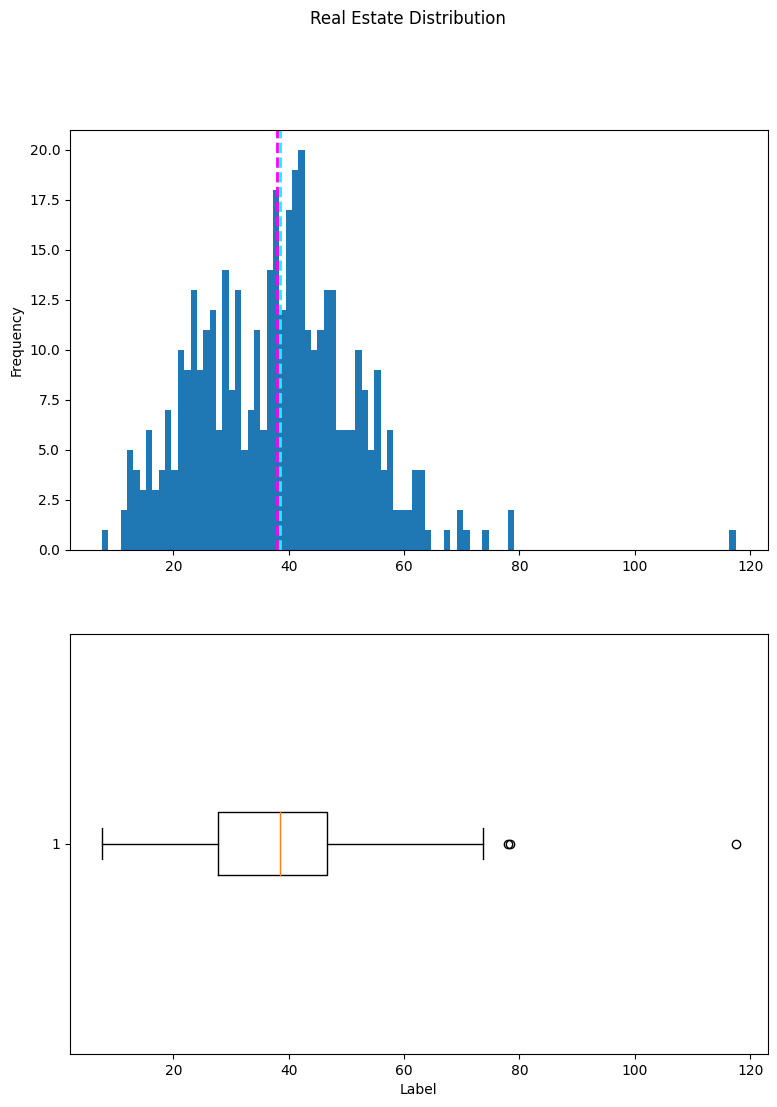

In [80]:
label = df[df.columns[-1]]

# create figure for 2 subplots
fig, ax = plt.subplots(2,1, figsize=(9,12))

#plot histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

#add line for the mean, median and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

#plot the boxplot
#plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')
#add a title to the figure

fig.suptitle('Real Estate Distribution')

fig.show()

The subplots show that distribution of real estate price fall in range of 10 to 80, with the mean/median near the central of data range. However, some outliers outside the range of value, so we remove it by plot the distribution of data with price unit under 78.

c:\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


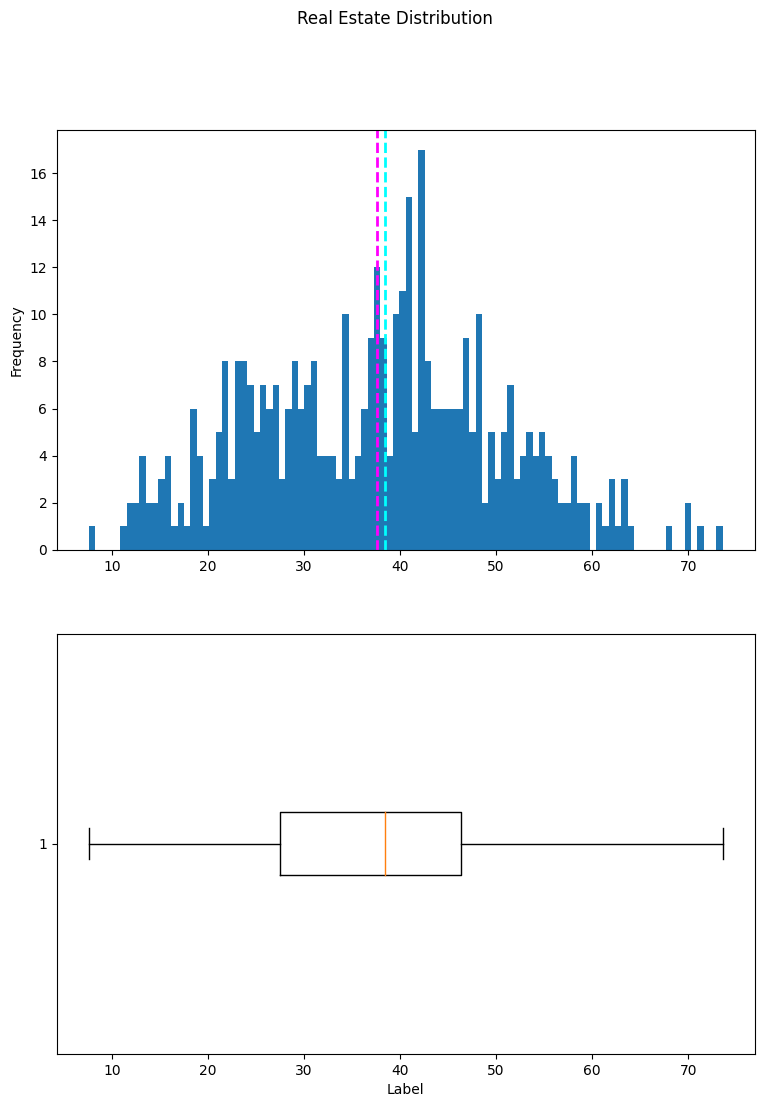

In [81]:
#Remove outliers
df = df[df['price_per_unit']<78]
label = df[df.columns[-1]]

# create figure for 2 subplots
fig, ax = plt.subplots(2,1, figsize=(9,12))

#plot histogram
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

#add line for the mean, median and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

#plot the boxplot
#plot the boxplot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')
#add a title to the figure

fig.suptitle('Real Estate Distribution')

fig.show()

**Correlation of numerics values and corrleation of categorical values**

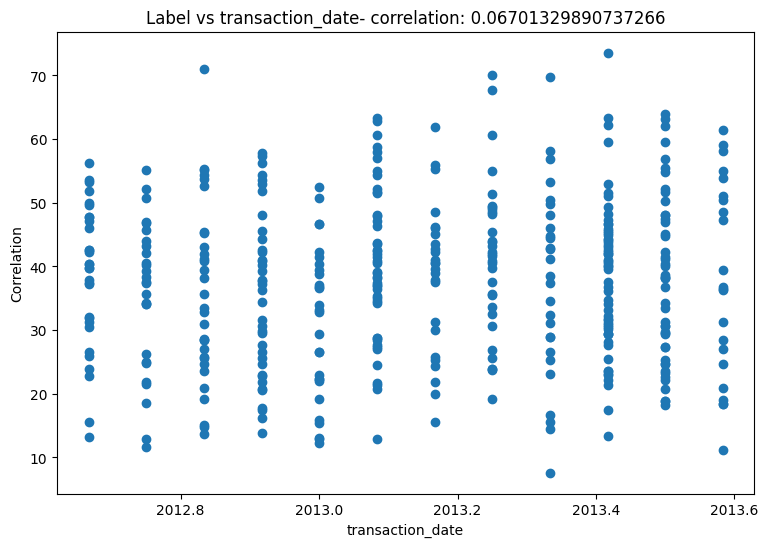

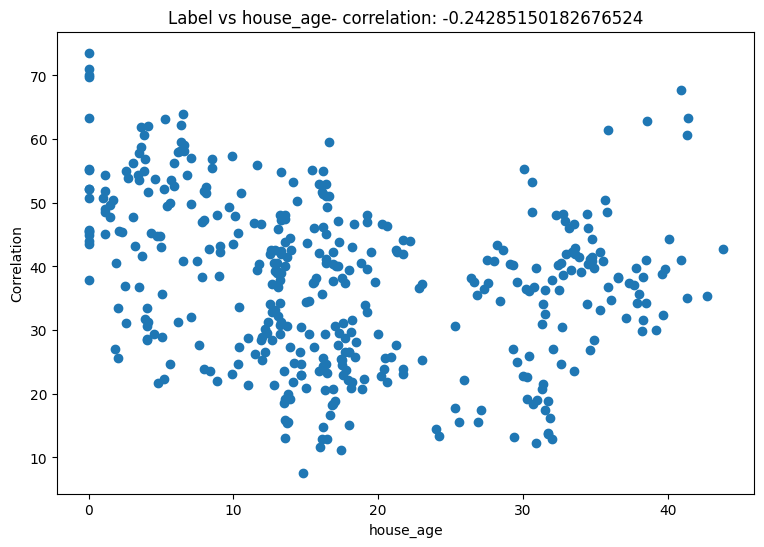

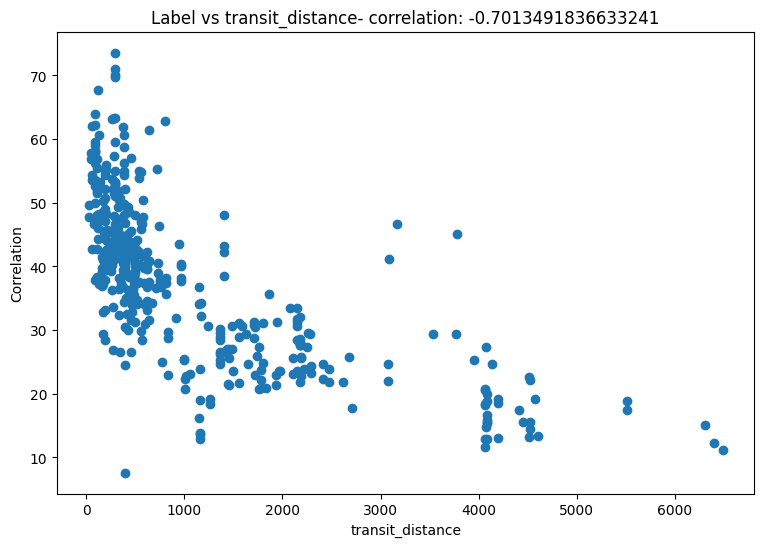

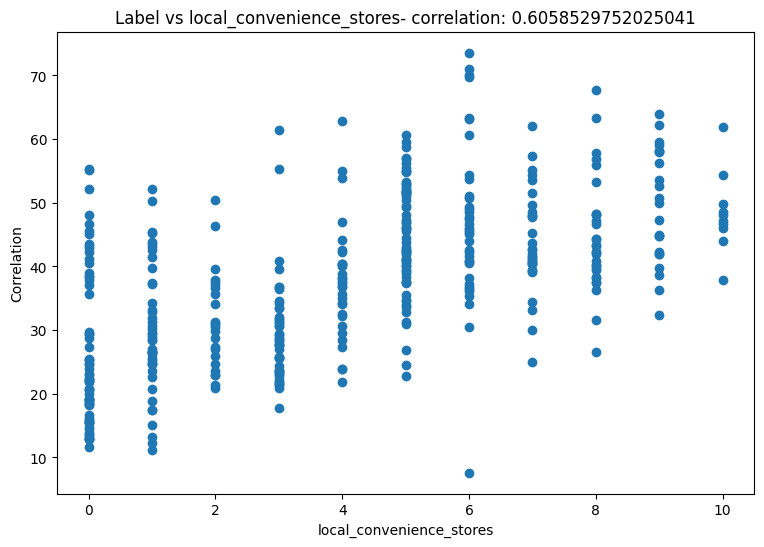

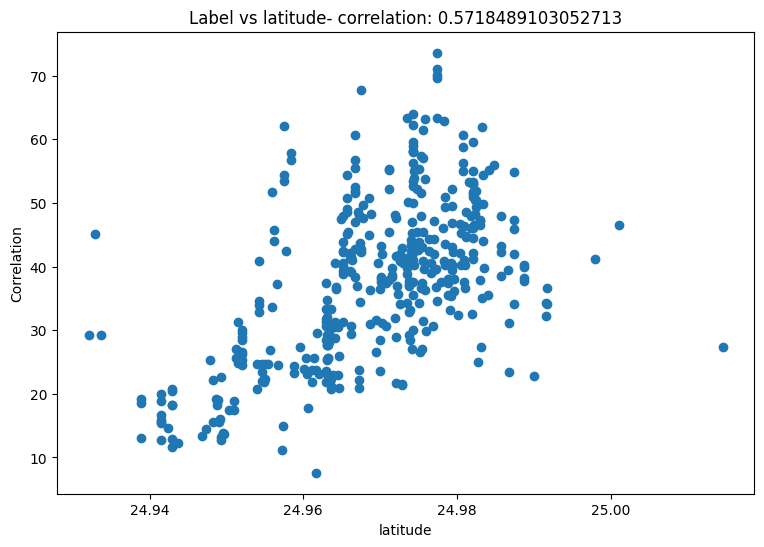

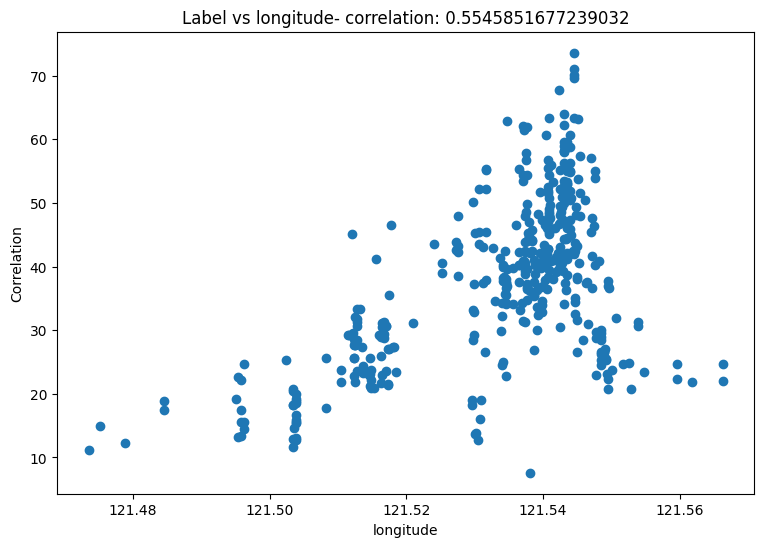

In [82]:
#corplot for each numeric features:
for col in df[df.columns[0:-1]]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Correlation')
    ax.set_title('Label vs ' + col + '- correlation: ' + str(correlation))
plt.show()

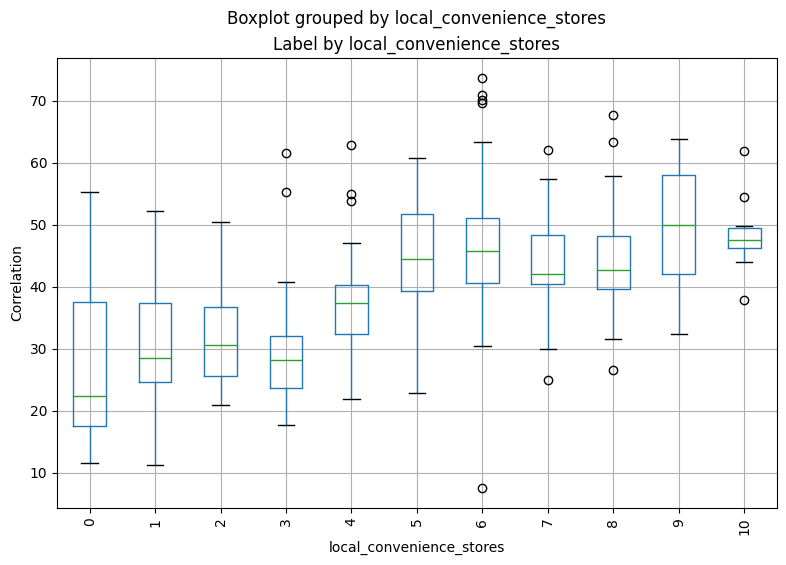

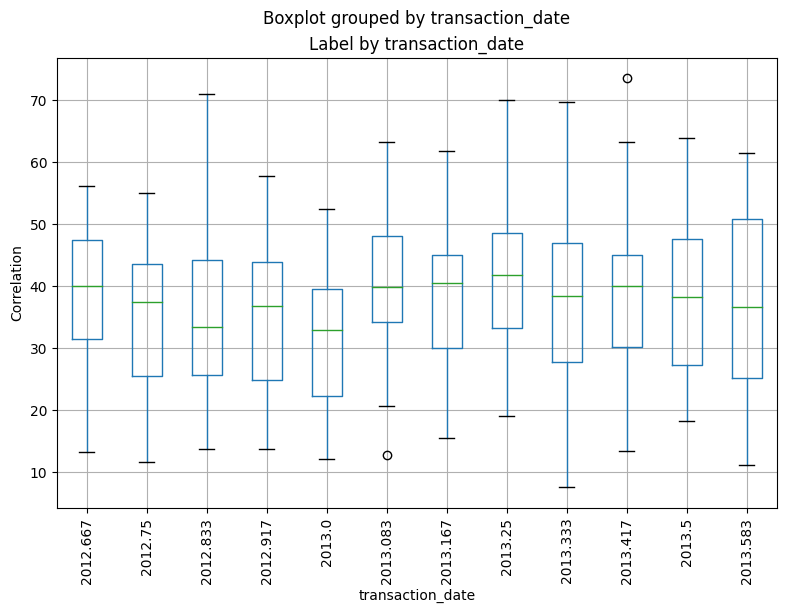

In [83]:
#Boxplot for categorical feature
for col in df[['local_convenience_stores', 'transaction_date']]:
    fig = plt.figure(figsize = (9,6))
    ax = fig.gca()
    df.boxplot(column = 'price_per_unit', by = col , ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Correlation")
    plt.xticks(rotation=90)
plt.show()

**Split data for training and test**

In [84]:
# Separate features and labels
X, y = df[['transaction_date','house_age', 'transit_distance','local_convenience_stores','latitude','longitude','price_per_unit']].values, df['price_per_unit'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[2.0129170e+03 3.2000000e+01 8.4878820e+01 1.0000000e+01 2.4982980e+01
  1.2154024e+02 3.7900000e+01]
 [2.0129170e+03 1.9500000e+01 3.0659470e+02 9.0000000e+00 2.4980340e+01
  1.2153951e+02 4.2200000e+01]
 [2.0135830e+03 1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01
  1.2154391e+02 4.7300000e+01]
 [2.0135000e+03 1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01
  1.2154391e+02 5.4800000e+01]
 [2.0128330e+03 5.0000000e+00 3.9056840e+02 5.0000000e+00 2.4979370e+01
  1.2154245e+02 4.3100000e+01]
 [2.0126670e+03 7.1000000e+00 2.1750300e+03 3.0000000e+00 2.4963050e+01
  1.2151254e+02 3.2100000e+01]
 [2.0126670e+03 3.4500000e+01 6.2347310e+02 7.0000000e+00 2.4979330e+01
  1.2153642e+02 4.0300000e+01]
 [2.0134170e+03 2.0300000e+01 2.8760250e+02 6.0000000e+00 2.4980420e+01
  1.2154228e+02 4.6700000e+01]
 [2.0135000e+03 3.1700000e+01 5.5120380e+03 1.0000000e+00 2.4950950e+01
  1.2148458e+02 1.8800000e+01]
 [2.0134170e+03 1.7900000e+01 1.7831800e+03 3.0000000e+00 2.496

In [85]:
from sklearn.model_selection import train_test_split

# Separate features (columns 1 [house_age] to the last but one) and labels (the last column)
X, y = df[df.columns[1:-1]].values, df[df.columns[-1]].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 287, rows
Test Set: 124 rows


**Process data and train model in pipeline**

In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [87]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


**Evaluate the model**

MSE: 30.390989067632034
RMSE: 5.512802288095596
R2: 0.7850338676682436


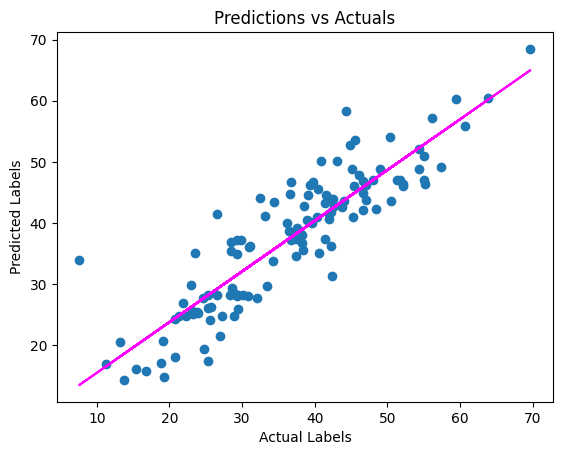

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

**Use trained model**

In [89]:
import joblib

# Save the model as a pickle file
filename = './real-estate.pkl'
joblib.dump(model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
47.02
16.13


The next transaction will be 47.02 for the house with age of 16.13 years old